# Actividad: Algoritmo de Bayes

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:**

---

In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('Social_Network_Ads.csv')

In [59]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Retiramos la columna `User ID` y utilizamos el método `columns` para comprobar que se haya eliminado exitosamente.

In [60]:
df = df.drop(['User ID'], axis=1)
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Entrenamiento del modelo

Importamos la función `train_test_split` de scikit-learn y lo utilizamos para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
Para las variables independites, definimos todas las filas de la columnas `Age` y `EstimatedSalary`, mientras que en las variables dependientes, definimos todas las filas de la columna `Purchased`.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:2],df.iloc[:,3], test_size = 0.2, random_state=42)

Importamos la clase `GaussianNB` de la librería `sklearn.naive_bayes`, la cual nos permite implementar el algoritmo de Naive Bayes utilizando la distribución gaussiana para modelar los datos numéricos. Posteriormente creamos una instancia del clasificador Naive Bayes utilizando la clase `GaussianNB`, esto nos permitirá configurar y entrenar nuestro modelo de clasificación.

Por último, implementamos el método `fit` para entrenar el modelo, utilizando nuestras variables de entrenamiento `x_train` y `y_train`.

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Una vez que hemos preparado nuestro modelo y cargado los datos de prueba, estamos listos para realizar las predicciones. Utilizaremos el método `predict()` proporcionado por el modelo Naive Bayes para predecir los resultados basados en los datos de prueba. Almacenamos los datos en nuestra variable `y_pred` y los imprimimos.

In [63]:
y_pred = nb.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 0]


Por último, evaluamos la exactitud del modelo comparando las predicciones generadas con los valores reales `y_test`. Utilizamos el método `score` del modelo para obtener la exactitud.

In [64]:
print("Exactitud del modelo: ", nb.score(x_test, y_test))

Exactitud del modelo:  0.9125


### Matriz de Confusión

Utilizamos una Matriz de Confusión como herraminta de evaluación del rendimiento de nuestro modelo de clasificación. Calculamos la matriz utilizando los valores reales `y_test` y las predicciones `y_pred`. Luego, creamos una visualización de la matriz utilizando `sns.heatmap` de seaborn.

In [65]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

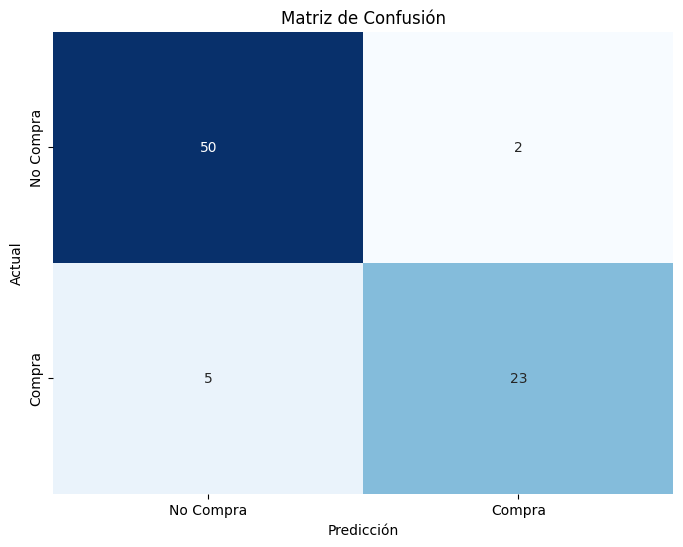

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Compra', 'Compra'])
plt.yticks([0.5, 1.5], ['No Compra', 'Compra'])
plt.title('Matriz de Confusión')
plt.show()

Al observar la matriz de confusión, podemos determinar cómo se distribuyen las predicciones del modelo en relación con los valores reales. Un buen modelo de clasificación tendrá una mayor cantidad de verdaderos positivos y verdaderos negativos, y una cantidad menor de falsos positivos y falsos negativos. En otras palabras:


*   Un mayor valor en el cuadro superior izquierdo (verdaderos positivos) indica una buena capacidad del modelo para predecir correctamente las compras.
*   Un mayor valor en el cuadro inferior derecho (verdaderos negativos) indica una buena capacidad del modelo para predecir correctamente las no compras.
*   Un valor bajo en los cuadros superiores derecho e inferiores izquierdos (falsos positivos y falsos negativos) indica un rendimiento deficiente en esas áreas.

Dicho lo anterior, aunado a nuestro valor de exactitud del modelo (previamente calculado), podemos comprobar que el modelo es confiable. Es decir, tiene altas probabilidades de identificar clientes potenciales





## Introduciendo variable "género"

Utilizamos nuestro DataFrame previamente `df` preparado

In [67]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Para retirar los datos categóricos y sustituirlos por númericos, primero necesitamos conocer la cantidad de categorías de las columnas que contienen este tipo de datos (`Gender`)

In [68]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Dado el código anterior, sabemos que nuestra columna `Gender` solo cuenta con dos valores categóricos: 'Male' y 'Female'.

A continuación, utilizamos el método `pd.get_dummies()` para crear variables dummy para la columna "Gender" del DataFrame. Esto nos permitirá convertir la columna categórica "Gender" en dos columnas numéricas: una para "Male" y otra para "Female".

In [69]:
gender_dummies = pd.get_dummies(df['Gender'], prefix = 'gender')
gender_dummies

,gender_Female,gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


Posteriormente, concatenamos las dos columnas previamente obtenidas (`gender_Female` y `gender_Male`) en nuestro DataFrame original `df`.

In [70]:
df = pd.concat([df, gender_dummies], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased,gender_Female,gender_Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


Eliminamos la columna "Gender", debido a que contiene valores categóricos. Comprobamos que se haya eliminado correctamente con el método `columns`.

In [71]:
df = df.drop(['Gender'], axis=1)
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'gender_Female', 'gender_Male'], dtype='object')

### Entrenamiento del modelo

Importamos la función `train_test_split` de scikit-learn y lo utilizamos para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
Para las variables independites, definimos todas las filas de la columnas `Age` ,`EstimatedSalary`, `gender_Female` y `gender_Male`; mientras que en las variables dependientes, definimos todas las filas de la columna `Purchased`.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,[0,1,3,4]],df.iloc[:,2], test_size = 0.2, random_state=42)

Importamos la clase `GaussianNB` de la librería `sklearn.naive_bayes`, la cual nos permite implementar el algoritmo de Naive Bayes utilizando la distribución gaussiana para modelar los datos numéricos. Posteriormente creamos una instancia del clasificador Naive Bayes utilizando la clase `GaussianNB`, esto nos permitirá configurar y entrenar nuestro modelo de clasificación.

Por último, implementamos el método `fit` para entrenar el modelo, utilizando nuestras variables de entrenamiento `x_train` y `y_train`.

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Una vez que hemos preparado nuestro modelo y cargado los datos de prueba, estamos listos para realizar las predicciones. Utilizaremos el método `predict()` proporcionado por el modelo Naive Bayes para predecir los resultados basados en los datos de prueba. Almacenamos los datos en nuestra variable `y_pred` y los imprimimos.

In [74]:
y_pred = nb.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]


Por último, evaluamos la exactitud del modelo comparando las predicciones generadas con los valores reales `y_test`. Utilizamos el método `score` del modelo para obtener la exactitud.

In [75]:
print("Exactitud del modelo: ", nb.score(x_test, y_test))

Exactitud del modelo:  0.9375
